In [2]:
!pip install pandas scikit-learn matplotlib numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 1.1 MB/s eta 0:00:00a 0:00:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 869.3 kB/s eta 0:00:000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.0 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.5/104.5 kB 2.1 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 65.8 MB/s eta 0:00:00:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 63.2 MB/s eta 0:00:00:00:01:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 71.6 MB/s eta 0:00:00:00:010:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 67.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 326.2/326.2 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 55.5 MB/s eta 0:00:0000:01:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1

In [15]:
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 3.5 MB/s eta 0:00:00a 0:00:01


In [3]:
import pandas as pd
from sklearn import preprocessing
from matplotlib import pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, f1_score, recall_score, precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import GridSearchCV

In [4]:
df1 = pd.read_csv('CEAS_08.csv')
df2 = pd.read_csv('Nazario.csv')

In [6]:
#combine dataframes that were used from different CSV files, so data isn't biased based on sample data
column_order = df1.columns 
df2 = df2[column_order]
df = pd.concat([df1, df2], ignore_index=True)

In [7]:
#look at the feature/their type and shape of data frame
df.info()
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40719 entries, 0 to 40718
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sender    40719 non-null  object
 1   receiver  40161 non-null  object
 2   date      40718 non-null  object
 3   subject   40687 non-null  object
 4   body      40719 non-null  object
 5   label     40719 non-null  int64 
 6   urls      40719 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 2.2+ MB
(40719, 7)


In [8]:
df

,sender,receiver,date,subject,body,label,urls
0,Young Esposito <Young@iworld.de>,user4@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 16:31:02 -0700",Never agree to be a loser,"Buck up, your troubles caused by small dimensi...",1,1
1,Mok <ipline's1983@icable.ph>,user2.2@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 18:31:03 -0500",Befriend Jenna Jameson,\nUpgrade your sex and pleasures with these te...,1,1
2,Daily Top 10 <Karmandeep-opengevl@universalnet...,user2.9@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 20:28:00 -1200",CNN.com Daily Top 10,>+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+...,1,1
3,Michael Parker <ivqrnai@pobox.com>,SpamAssassin Dev <xrh@spamassassin.apache.org>,"Tue, 05 Aug 2008 17:31:20 -0600",Re: svn commit: r619753 - in /spamassassin/tru...,Would anyone object to removing .so from this ...,0,1
4,Gretchen Suggs <externalsep1@loanofficertool.com>,user2.2@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 19:31:21 -0400",SpecialPricesPharmMoreinfo,\nWelcomeFastShippingCustomerSupport\nhttp://7...,1,1
...,...,...,...,...,...,...,...
40714,info advantageapartments.com <info@advantageap...,"""jose@monkey.org"" <jose@monkey.org>","Sun, 11 Dec 2022 12:04:50 +0000",Receipt for Your Payment to FTX.,PayPal You sent a payment of $699.99 USD to FT...,1,0
40715,monkey.org <HELPDESK@monkey.org>,jose@monkey.org,15 Dec 2022 18:33:00 -0500,Rectify Your Password With monkey.org,"monkey.org Hi jose,Pa⁠s⁠sword for⁠ jose@monke...",1,1
40716,Help Center\n\t<info.help-center.co.za_info.he...,jose@monkey.org,"Tue, 20 Dec 2022 23:00:27 +0000 (UTC)",Netflix : We're having some trouble with your ...,"HELLO, Please note that, your monthly paymen...",1,1
40717,MetaMask <info@sofamekar.com>,jose@monkey.org,27 Dec 2022 10:56:49 +0800,Your MetaMask wallet will be suspended,Verify your MetaMask Wallet Our system has sho...,1,1


In [10]:
!pip install nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 586.3 kB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 9.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 792.7/792.7 kB 28.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.2/102.2 kB 2.9 MB/s eta 0:00:00


In [11]:
#use nltk to use for tokenize words for TF-IDF
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     /home/u1d58ba7ae259488a73453704489009b/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/u1d58ba7ae259488a73453704489009b/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/u1d58ba7ae259488a73453704489009b/nltk_data...


True

In [12]:
from nltk.stem import PorterStemmer
import scipy.sparse as sp
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import FunctionTransformer, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from nltk.stem import PorterStemmer

In [13]:
class EmailPreProcessor(BaseEstimator, TransformerMixin):
    def __init__(self):
      #encodes key phishing phrases as a binary feature
        self.phishing_keywords = ['verify', 'login', 'update', 'account', 'urgent', 'click', 'security']
        self.stemmer = PorterStemmer()
    def contains_phishing_words(self, text):
        words = str(text).lower().split()
        stems = [self.stemmer.stem(word) for word in words]
        return int(any(kw in stems for kw in self.stemmed_keywords))

    def fit(self, X, y=None):
        self.stemmed_keywords = [self.stemmer.stem(w) for w in self.phishing_keywords]
        return self

    def transform(self, X):
        df = X.copy()
        df['subject'] = df['subject'].fillna('')
        df['body'] = df['body'].fillna('')
        df['text'] = df['subject'] + ' ' + df['body']
        df['date'] = pd.to_datetime(df['date'], errors='coerce', utc=True)

      #breaks down the date string into hour, day of the week, and is_weekend
        df['hour'] = df['date'].dt.hour.fillna(0)
        df['day_of_week'] = df['date'].dt.dayofweek.fillna(0)
        df['is_weekend'] = df['day_of_week'].apply(lambda x: int(x >= 5))
      
      #creates feature for subject and body length
        df['subject_len'] = df['subject'].apply(len)
        df['body_len'] = df['body'].apply(len)

        df['sender_domain'] = df['sender'].apply(lambda x: str(x).split('@')[-1].lower())
        df['domain_freq'] = df['sender_domain'].map(df['sender_domain'].value_counts())

        df['suspicious_subject'] = df['subject'].apply(self.contains_phishing_words)
        df['suspicious_body'] = df['body'].apply(self.contains_phishing_words)
     
      #creates a feature for other supiscious email content like the number of exclamination marks or capital letters causing urgency
        df['num_exclaims'] = df['body'].str.count('!')
        df['uppercase_ratio'] = df['body'].apply(lambda x: sum(c.isupper() for c in str(x)) / (len(str(x)) + 1e-6))
        df['has_html'] = df['body'].apply(lambda x: int('<html' in str(x).lower() or '</' in str(x).lower()))

      #default urls column if missing
        if 'urls' not in df.columns:
            df['urls'] = 0

        numeric_features = df[[
            'hour', 'day_of_week', 'is_weekend',
            'subject_len', 'body_len', 'urls',
            'domain_freq', 'suspicious_subject', 'suspicious_body',
            'num_exclaims', 'uppercase_ratio', 'has_html'
        ]].fillna(0).values

        return numeric_features

#vectorize text to a bag of words using 1000 features for runtime
def combine_subject_body(df):
    return df['subject'].fillna('') + ' ' + df['body'].fillna('')

text_vectorizer = Pipeline([
    ('extract_text', FunctionTransformer(combine_subject_body, validate=False)),
    ('tfidf', TfidfVectorizer(max_features=1000, stop_words='english'))
])

#numeric processing
numeric_processor = Pipeline([
    ('features', EmailPreProcessor()),
    ('scaler', StandardScaler())
])

#combining text and numeric features
full_features = FeatureUnion([
    ('text', text_vectorizer),
    ('numeric', numeric_processor)
])

#use tuned random forest with a balanced weight due to more non-phishing emails than phishing
#using cross-validation found best random forest hyper parameters
final_pipeline = Pipeline([
    ('features', full_features),
    ('clf', RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=5, min_samples_split=10, random_state=42))
])

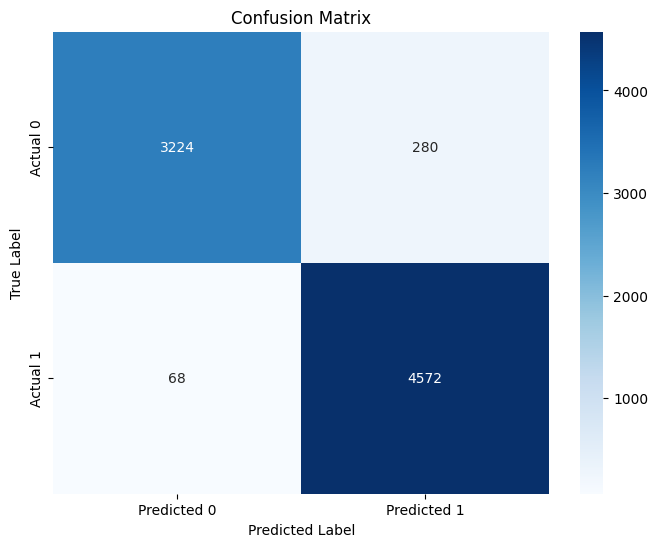

              precision    recall  f1-score   support

           0       0.98      0.92      0.95      3504
           1       0.94      0.99      0.96      4640

    accuracy                           0.96      8144
   macro avg       0.96      0.95      0.96      8144
weighted avg       0.96      0.96      0.96      8144



In [16]:
#Accuracy of Model is 96%, and F1 Score is 96%
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Split data
y = df['label']
X = df.drop(columns='label')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit and predict
final_pipeline.fit(X_train, y_train)
y_pred = final_pipeline.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_test, y_pred))

In [18]:
#Part 2: Testing/predicting individual objects and saving the model
final_pipeline.fit(X_train, y_train)

import pickle
with open('final_model.pkl', 'wb') as f:
    pickle.dump(final_pipeline, f)

In [19]:
#test on real phishing email
new_email = {
    'subject': 'LastPass Security Notice',
    'body': '''Dear LastPass User,

We wanted to alert you that, recently, our team discovered and immediately blocked suspicious activity on our network. Some user vault data was taken including email addresses and passwords.

To be sure that your information was NOT compromised, we have built this secure web site where you can enter your last pass login information and we can tell you if your account was one that was compromised.

We apologize for the inconvenience, but ultimately we believe this will better protect LastPass users. Thank you for your understanding, and for using LastPass.

Regards,
The LastPass Team

Learn More
''',
    'sender': 'LastPass <LastPass@secure-monitor.com>',
    'date': '2025-05-17 2:58:00',
    'urls': 2
}
test_df = pd.DataFrame([new_email])

#load model for pickle
with open('final_model.pkl', 'rb') as f:
    model = pickle.load(f)

#predict
pred = model.predict(test_df)
prob = model.predict_proba(test_df)

print("Prediction:", pred[0])             
print("Phishing probability:", prob[0][1])

Prediction: 1
Phishing probability: 0.5205455307355593


In [20]:
#test on real non-phishing email
new_email = {
    'sender': "commencement@scu.edu <commencement@scu.edu>",
    'date': "	2025-05-15, 2:58:00",      # or current time
    'subject': "2025 Commencement Reminder - Deadline to Order Academic Attire",
    'body': """Dear Emma,
This is a reminder that the deadline to order Academic Attire is Sunday, May 18.

Additioanlly, graduates and their families are invited to participate in SCU’s Commencement Liturgy, one of the most joyful moments of Commencement Weekend. Worship with fellow graduates and give thanks for your special time at Santa Clara on Friday, June 13 at 4:00 p.m. in SCU's historic Mission Santa Clara de Asís. Please let us know if you intend to join us at the Liturgy by registering here. Tickets are not required for this event and all are welcome to attend.

Should you need to modify your Guest Ticket(s) for the Commencement Ceremony, please do so by Thursday, June 12.

You may login to Tassel anytime by going to the https://scu.tassel.com/login and using this email address:
ewegner@scu.edu

Please review the list of Commencement deadlines below:
May 18 - Deadline to Order Academic Attire
June 12 - Deadline to modify Guest Tickets (Tassel)

Congratulations,
The Commencement Office
""",
    'urls': 5
}
test_df = pd.DataFrame([new_email])

#predict
pred = final_pipeline.predict(test_df)
prob = final_pipeline.predict_proba(test_df)

print("Prediction:", pred[0])             
print("Phishing probability:", prob[0][1]) 

Prediction: 0
Phishing probability: 0.4240670752093259


In [21]:
#testing/tuning hyperparemeters

'''from sklearn.feature_extraction.text import TfidfVectorizer

df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['hour'] = df['date'].dt.hour
df['day_of_week'] = df['date'].dt.dayofweek
df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)
df['subject_len'] = df['subject'].apply(lambda x: len(str(x)))
df['body_len'] = df['body'].apply(lambda x: len(str(x)))
df['text'] = df['subject'].fillna('') + ' ' + df['body']
df['sender_domain'] = df['sender'].apply(lambda x: str(x).split('@')[-1])
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X_text = vectorizer.fit_transform(df['text'])

from sklearn.preprocessing import LabelEncoder

le_sender = LabelEncoder()
df['sender_enc'] = le_sender.fit_transform(df['sender_domain'])

import scipy.sparse as sp

X_numeric = df[['hour', 'day_of_week', 'is_weekend', 'subject_len', 'body_len', 'urls', 'sender_enc', 'receiver_enc']].values
X_final = sp.hstack((X_text, X_numeric))
y = df['label']
'''

"from sklearn.feature_extraction.text import TfidfVectorizer\n\ndf['date'] = pd.to_datetime(df['date'], errors='coerce')\ndf['hour'] = df['date'].dt.hour\ndf['day_of_week'] = df['date'].dt.dayofweek\ndf['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)\ndf['subject_len'] = df['subject'].apply(lambda x: len(str(x)))\ndf['body_len'] = df['body'].apply(lambda x: len(str(x)))\ndf['text'] = df['subject'].fillna('') + ' ' + df['body']\ndf['sender_domain'] = df['sender'].apply(lambda x: str(x).split('@')[-1])\nvectorizer = TfidfVectorizer(max_features=1000, stop_words='english')\nX_text = vectorizer.fit_transform(df['text'])\n\nfrom sklearn.preprocessing import LabelEncoder\n\nle_sender = LabelEncoder()\ndf['sender_enc'] = le_sender.fit_transform(df['sender_domain'])\n\nimport scipy.sparse as sp\n\nX_numeric = df[['hour', 'day_of_week', 'is_weekend', 'subject_len', 'body_len', 'urls', 'sender_enc', 'receiver_enc']].values\nX_final = sp.hstack((X_text, X_numeric))\ny = df['

In [22]:
'''
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

rf = RandomForestClassifier(random_state=42, class_weight='balanced')
preprocessor = EmailPreprocessor()
X = preprocessor.fit_transform(df)
y = df['label']

param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,             # Number of random combinations to try
    cv=3,                  # Fewer folds = faster
    scoring='accuracy',
    n_jobs=-1,
    verbose=2,
    random_state=42
)

random_search.fit(X, y)'''
# RandomForestClassifier(class_weight='balanced', criterion='entropy', max_depth=5, min_samples_split=10, random_state=42) has the best fit with a 0.94 
#percent accuracy

"\nfrom sklearn.model_selection import RandomizedSearchCV\nfrom sklearn.ensemble import RandomForestClassifier\nfrom scipy.stats import randint\n\nrf = RandomForestClassifier(random_state=42, class_weight='balanced')\npreprocessor = EmailPreprocessor()\nX = preprocessor.fit_transform(df)\ny = df['label']\n\nparam_dist = {\n    'n_estimators': randint(50, 200),\n    'max_depth': [None, 5, 10, 20],\n    'min_samples_split': [2, 5, 10],\n    'criterion': ['gini', 'entropy']\n}\n\nrandom_search = RandomizedSearchCV(\n    estimator=rf,\n    param_distributions=param_dist,\n    n_iter=20,             # Number of random combinations to try\n    cv=3,                  # Fewer folds = faster\n    scoring='accuracy',\n    n_jobs=-1,\n    verbose=2,\n    random_state=42\n)\n\nrandom_search.fit(X, y)"

In [23]:
# A confusion matrix to ensure that the data is not skewed by imbalanced data
'''import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_pred = rf.predict(X)
cm = confusion_matrix(y, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()''' 

"import matplotlib.pyplot as plt\nfrom sklearn.metrics import confusion_matrix\nimport seaborn as sns\ny_pred = rf.predict(X)\ncm = confusion_matrix(y, y_pred)\n\n# Plot the confusion matrix using seaborn\nplt.figure(figsize=(8, 6))\nsns.heatmap(cm, annot=True, fmt='d', cmap='Blues',\n            xticklabels=['Predicted 0', 'Predicted 1'],\n            yticklabels=['Actual 0', 'Actual 1'])\nplt.xlabel('Predicted Label')\nplt.ylabel('True Label')\nplt.title('Confusion Matrix')\nplt.show()"